1. Data Loading:
If you're using a built-in dataset, for example, the Breast Cancer dataset from sklearn.datasets:

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Inspect the data
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

2. Data Preprocessing:
Handle missing values, encode categorical features, and scale numerical data.

In [3]:
# Check for missing values
print(df.isnull().sum())  # Assuming no missing values for sklearn dataset

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['target'])), columns=data.feature_names)

# Re-add target column to scaled dataframe
df_scaled['target'] = df['target']


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


3. Data Splitting:
Split the dataset into training and testing sets.

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Model Selection:
Train at least two classification models, such as Logistic Regression and Random Forest.

In [5]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

5. Model Evaluation:
Evaluate the models using accuracy, precision, recall, F1-score, and ROC AUC.

Logistic Regression Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
ROC AUC: 0.99737962659679

Random Forest Metrics:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.9959056665574845


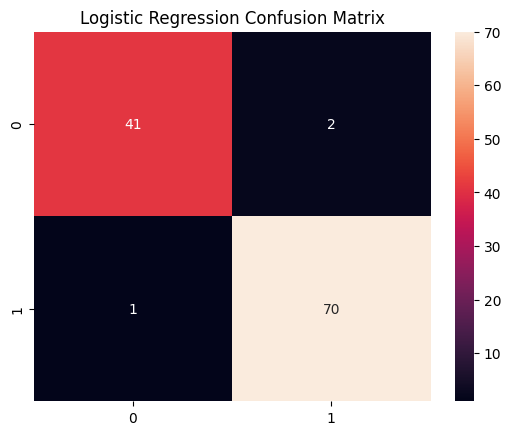

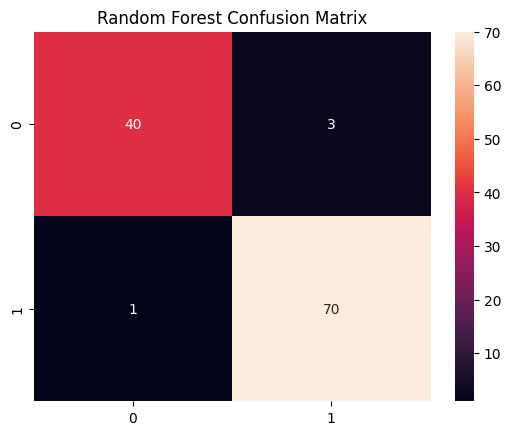

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Precision:", precision_score(y_test, log_reg_pred))
print("Recall:", recall_score(y_test, log_reg_pred))
print("F1 Score:", f1_score(y_test, log_reg_pred))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Confusion matrix for both models
log_cm = confusion_matrix(y_test, log_reg_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Visualize confusion matrix
sns.heatmap(log_cm, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

sns.heatmap(rf_cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


6. Cross-Validation (Optional):
Use GridSearchCV or RandomizedSearchCV to tune hyperparameters.

In [7]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.9648351648351647


7. Conclusion:
Compare the performance of both models based on the metrics.
Discuss the impact of data preprocessing and scaling.
Reflect on the improvements seen with hyperparameter tuning.


Optional Visualizations:
ROC Curve:

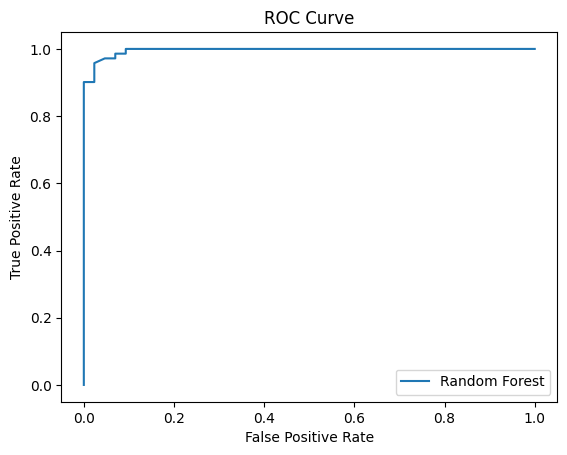

In [8]:
from sklearn.metrics import roc_curve

# ROC curve for Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Key Libraries Used:
pandas for data handling
scikit-learn for model training, evaluation, and splitting
matplotlib and seaborn for visualizations
This approach gives a complete workflow to execute a classification model using scikit-learn, including data preprocessing, training, evaluation, and optional tuning.